# EBL  

In [1]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc7


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_dominguez=EBLAbsorptionTemplate.from_name('Dominguez_2010_v2011')
ebl_finke=EBLAbsorptionTemplate.from_name('Finke_2010')
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/plot_sedfit.py:654: RuntimeWarning: divide by zero encountered in log10
  self.ax.plot(np.log10(nu), np.log10(y),label=label,ls=line_style,color=color)


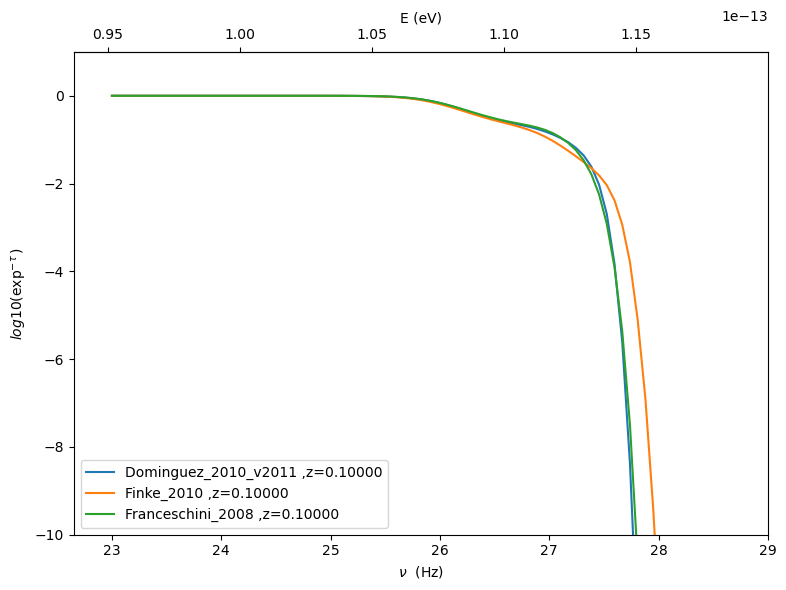

In [3]:
z=0.1
nu=np.logspace(23,30,100)
ebl_dominguez.parameters.z_cosm.val=z
ebl_dominguez.eval(nu=nu)
ebl_finke.parameters.z_cosm.val=z
ebl_finke.eval(nu=nu)
ebl_franceschini.parameters.z_cosm.val=z
ebl_franceschini.eval(nu=nu)
p=ebl_dominguez.plot_model()
ebl_finke.plot_model(p)
ebl_franceschini.plot_model(p)
p.setlim(y_max=1,y_min=-10,x_max=29)

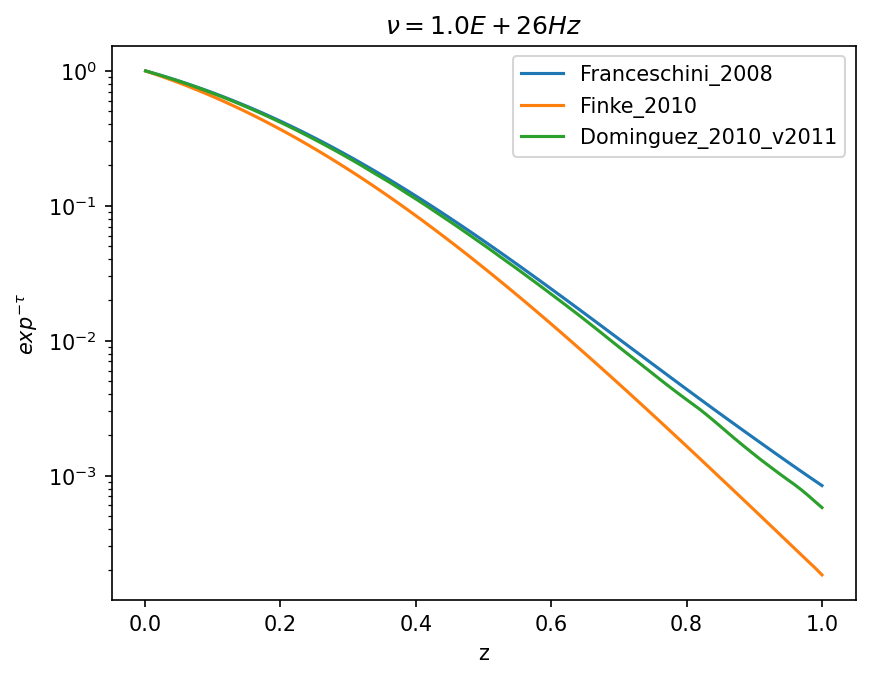

In [7]:
plt.figure(dpi=150)

nu=1E26
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)[0]
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)[0]
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)[0]


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

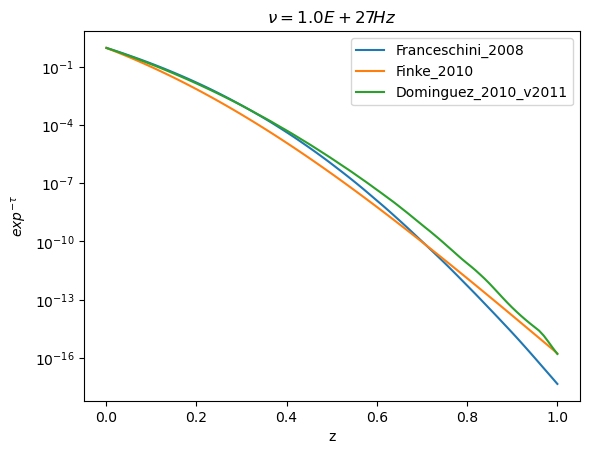

In [8]:
%matplotlib inline
z_range=np.linspace(0.001,1,100)
y_fr = np.zeros(z_range.size)
y_fi = np.zeros(z_range.size)
y_do = np.zeros(z_range.size)
nu=1E27
for ID,z in enumerate(z_range):
    ebl_franceschini.parameters.z_cosm.val=z
    ebl_finke.parameters.z_cosm.val=z
    ebl_dominguez.parameters.z_cosm.val=z
    y_fr[ID]=ebl_franceschini.eval(nu=nu,get_model=True)[0]
    y_fi[ID]=ebl_finke.eval(nu=nu,get_model=True)[0]
    y_do[ID]=ebl_dominguez.eval(nu=nu,get_model=True)[0]


plt.plot(z_range,y_fr,label='%s'%ebl_franceschini.name)
plt.plot(z_range,y_fi,label='%s'%ebl_finke.name)
plt.plot(z_range,y_do,label='%s'%ebl_dominguez.name)

plt.xlabel('z')
plt.ylabel(r'$exp^{-\tau}$')
plt.legend()
plt.semilogy()
t=plt.title(r'$\nu=%1.1E Hz$'%nu)

## Combine a Jet model with the EBL model 

As first step, we define our Jet model

In [9]:
from jetset.jet_model import Jet
from jetset.model_manager import FitModel

my_jet=Jet(electron_distribution='lppl',name='jet_leptonic')

===> setting C threads to 12


In [10]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [11]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/model_manager.py:158: UserWarning: no cosmology defined, using FlatLambdaCDM(name="Planck13", H0=67.77 km / (Mpc s), Om0=0.30712, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.048252)
  warnings.warn(m)


In [12]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [13]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')

adding par: z_cosm to  z_cosm


In [14]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


These methods are alternative ways to set a parameter in a composite model

In [15]:
composite_model.jet_leptonic.parameters.z_cosm.val=0.1
composite_model.set_par('jet_leptonic','z_cosm',0.1)
composite_model.set_par(my_jet,'z_cosm',0.1)

Since as default, added components are summed together, so we need to define the correct multiplicative for for the composite model.

In [16]:
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------


This can be done just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [17]:
composite_model.composite_expr='jet_leptonic*Franceschini_2008'

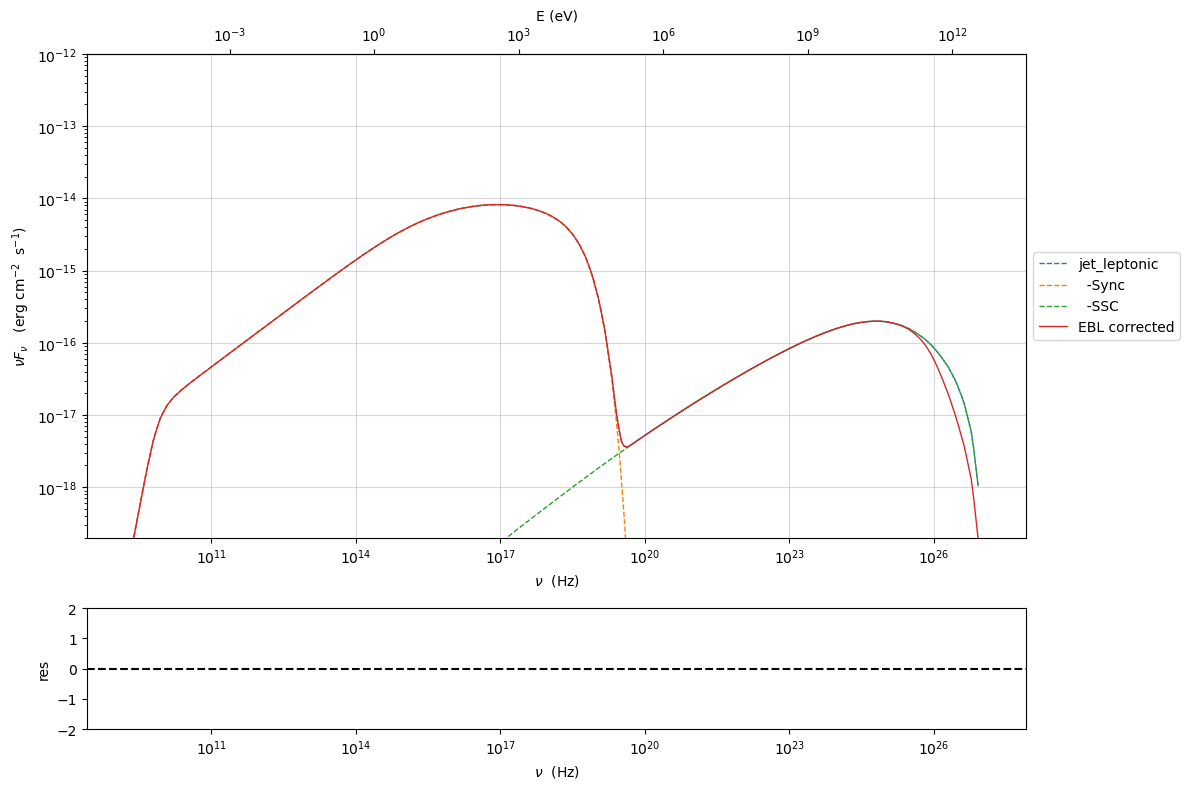

In [18]:
composite_model.jet_leptonic.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
p.setlim(y_max=1E-12)

if you want to remove the link from the parameter 

In [19]:
composite_model.parameters.reset_dependencies()

In [20]:
composite_model.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


None

now the two `z_cosm` parameters are not linkend anymore

## Example of model fitting with EBL

In [21]:
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data

In [22]:
test_SEDs

['/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_ABS.ecsv',
 '/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']


***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2
msk [False  True False  True  True  True  True  True False False False  True
 False False False False False False False False False False False False
 False  True  True  True  True  True  True False False False False False
 False False  True  True  True  True False  True  True  True  True  True
  True False  True False False False False False False False False False
 False False False False False False  True False  True False  True False
  True False  True False  True False False False False False  True  True
  True  True  True  True  True False]



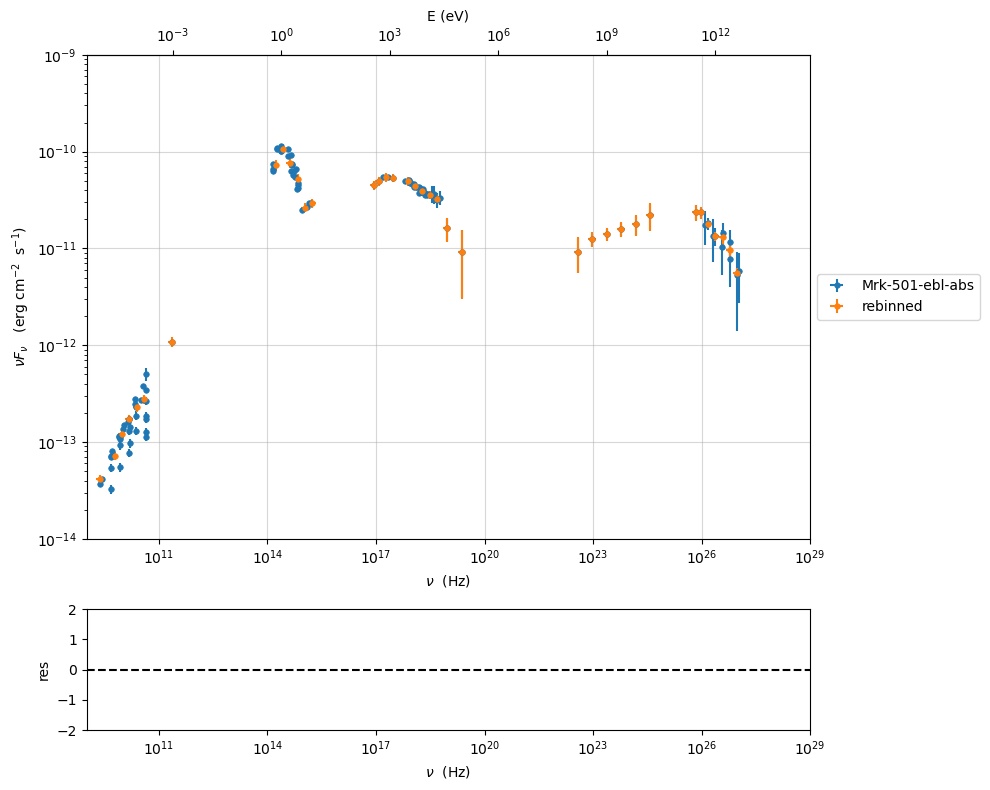

In [23]:
%matplotlib inline
data=Data.from_file(test_SEDs[2])
sed_data=ObsData(data_table=data)
myPlot=sed_data.plot_sed()

sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.setlim(y_min=1E-14,y_max=1E-9,x_min=1E9,x_max=1E29)


*** evaluating spectral indices for data ***


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:154: RuntimeWarning: invalid value encountered in scalar divide
  ratio = phi / phi_prime
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:398: RuntimeWarning: invalid value encountered in cast
  return min_step, np.equal(steps, min_step) * np.sign(s).astype(int)


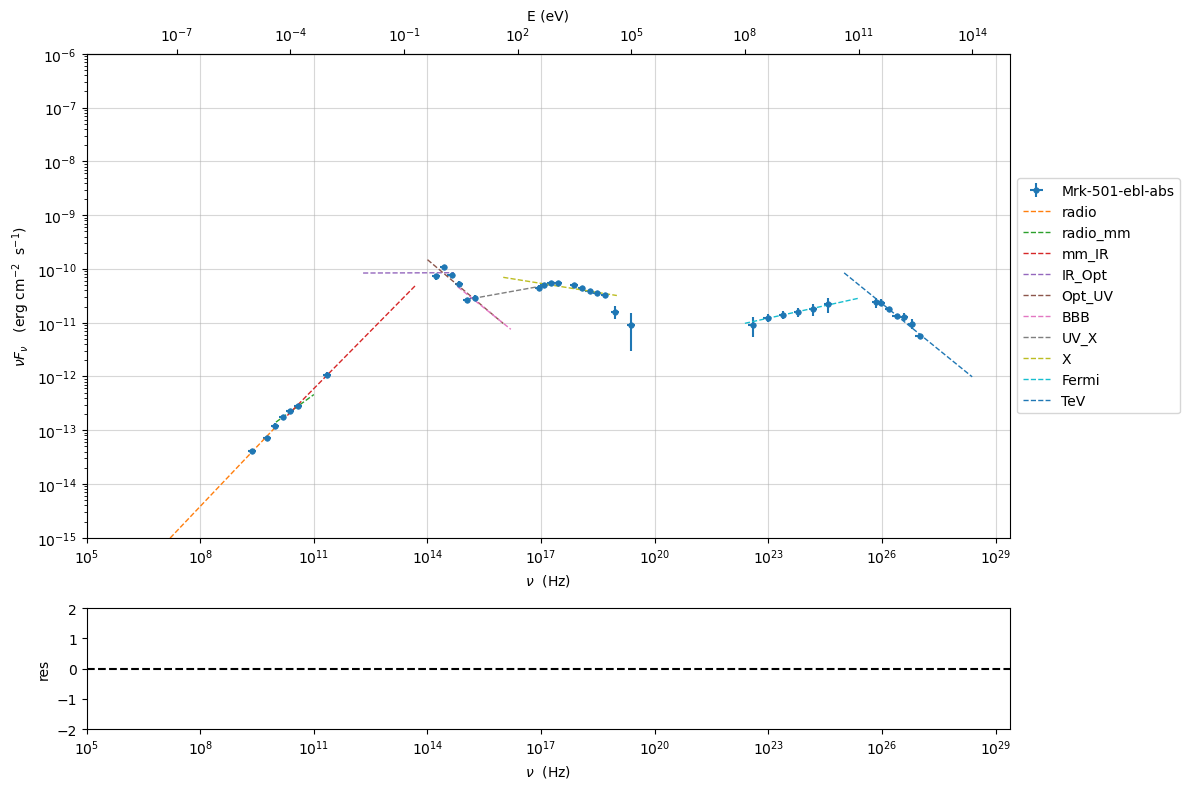

In [24]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.setlim(y_min=1E-15,y_max=1E-6)

In [25]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:154: RuntimeWarning: invalid value encountered in scalar divide
  ratio = phi / phi_prime
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:398: RuntimeWarning: invalid value encountered in cast
  return min_step, np.equal(steps, min_step) * np.sign(s).astype(int)
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: divide by zero encountered in scalar divide
  alpha *= Delta / Delta_new
/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_upper = norm(suf) / Delta


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-6.522794e-02,-6.522794e-02,5.892905e-03,--,-4.913172e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.908748e-03,-1.908748e-03,8.488797e-04,--,5.440153e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.704833e+01,1.704833e+01,6.858392e-02,--,1.593204e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.030052e+01,-1.030052e+01,1.424853e-02,--,-1.022242e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.008538e+01,-1.008538e+01,2.900917e-02,--,-1.022242e+01,-1.222242e+01,-8.222416e+00,False
host_galaxy,nu_scale,1.934519e-02,1.934519e-02,1.919833e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.704833e+01 (err=+6.858392e-02)  nuFnu_p=-1.030052e+01 (err=+1.424853e-02) curv.=-6.522794e-02 (err=+5.892905e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit
====> simplex
====> migrad
====> simplex
====> migrad
====> simplex
====> migrad
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.569967e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-4.422595e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.530691e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (s cm2),-1.058920e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=99
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.768                      │              Nfcn = 99               │
│ EDM = 1.26e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  -0.157   │   0.025   │            │            │   -10   │    0    │       │
│ 1 │ par_1 │  -0.044   │   0.020   │            │            │   -10   │   10    │       │
│ 2 │ par_2 │   25.31   │   0.18    │            │            │    0    │   30    │       │
│ 3 │ par_3 │  -10.59   │   0.05    │            │            │   -30   │    0    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

dof=7
chisq=2.767806, chisq/red=0.395401 null hypothesis sig=0.905619

stats without the UL
dof  UL=7
chisq=2.767806, chisq/red=0.395401 null hypothesis sig=0.905619


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.569967e-01,-1.569967e-01,2.511269e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.422595e-02,-4.422595e-02,2.000320e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.530691e+01,2.530691e+01,1.798034e-01,--,2.536233e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058920e+01,-1.058920e+01,4.983735e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.569967e-01,-1.569967e-01,2.511269e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-4.422595e-02,-4.422595e-02,2.000320e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.530691e+01,2.530691e+01,1.798034e-01,--,2.536233e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.058920e+01,-1.058920e+01,4.983735e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.530691e+01 (err=+1.798034e-01)  nuFnu_p=-1.058920e+01 (err=+4.983735e-02) curv.=-1.569967e-01 (err=+2.511269e-02)



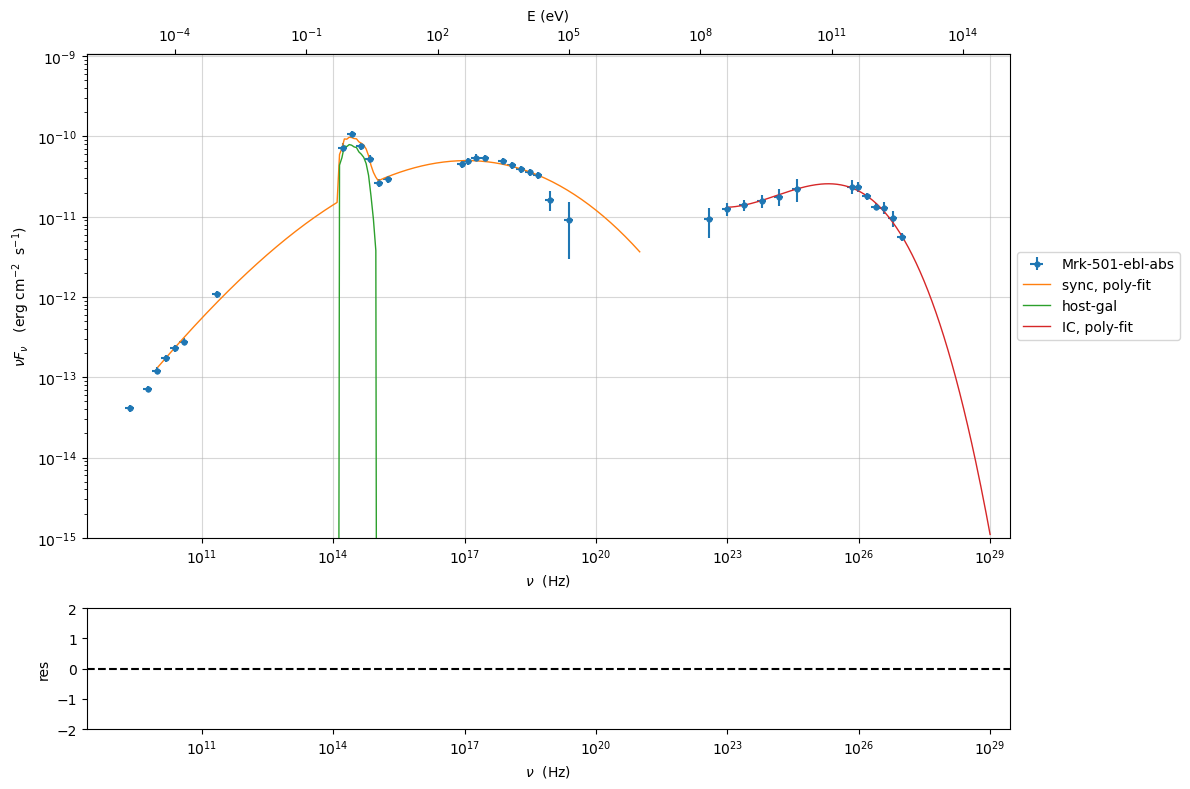

In [26]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.setlim(y_min=1E-15)

In [27]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***

===> setting C threads to 12


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/obs_constrain.py:1125: RankWarning: Polyfit may be poorly conditioned
  p=polyfit(nu_p_IC_model_log,B_grid_log,2)


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.153993e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.237058e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.107634e+04,1.000000e+00,1.000000e+09,False,False


/Users/orion/miniforge3/envs/jetset/lib/python3.10/site-packages/jetset/model_manager.py:158: UserWarning: no cosmology defined, using FlatLambdaCDM(name="Planck13", H0=67.77 km / (Mpc s), Om0=0.30712, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.048252)
  warnings.warn(m)


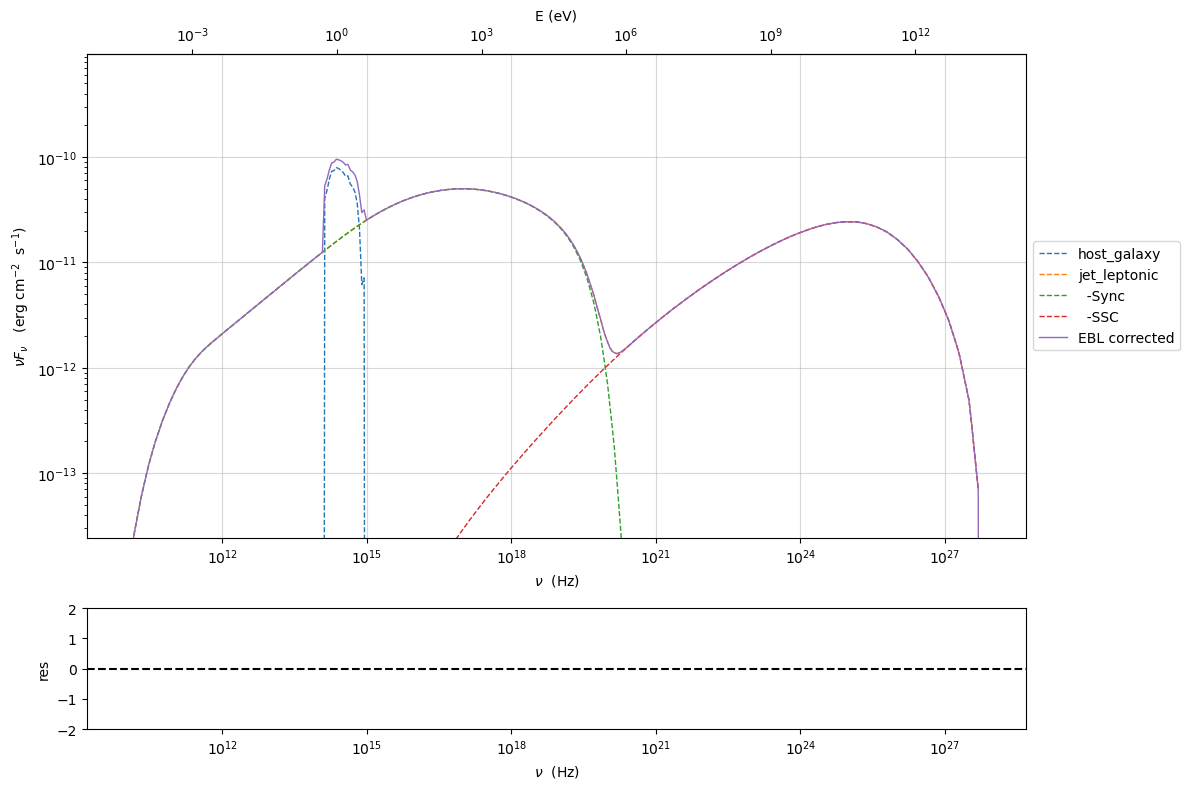

In [28]:
composite_model=FitModel(nu_size=500,name='EBL corrected',template=my_shape.host_gal)
composite_model.add_component(prefit_jet)
composite_model.eval()
composite_model.plot_model()

In [29]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')
composite_model.add_component(ebl_franceschini)

In [30]:
composite_model.link_par(par_name='z_cosm', from_model='Franceschini_2008', to_model='jet_leptonic')
composite_model.composite_expr='(jet_leptonic+host_galaxy)*Franceschini_2008'

adding par: z_cosm to  z_cosm


In [31]:
composite_model.show_model()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: host_galaxy model type: template
 -model name: jet_leptonic model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------
individual component description

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: host_galaxy  
type: template  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (s cm2),-1.008538e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.934519e-02,-2.000000e+00,2.000000e+00,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 1.487509e+02
 gmax grid : 2.310708e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+3

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.153993e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,5.050000e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,2.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.487509e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.310708e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.237058e+01,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.107634e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
model description
--------------------------------------------------------------------------------
name: Franceschini_2008  
type: table2D  

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
Franceschini_2008,scale_factor,scale_factor,,1.000000e+00,0.000000e+00,--,False,True
Franceschini_2008,"z_cosm(L,jet_leptonic)",redshift,,--,--,--,False,True


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


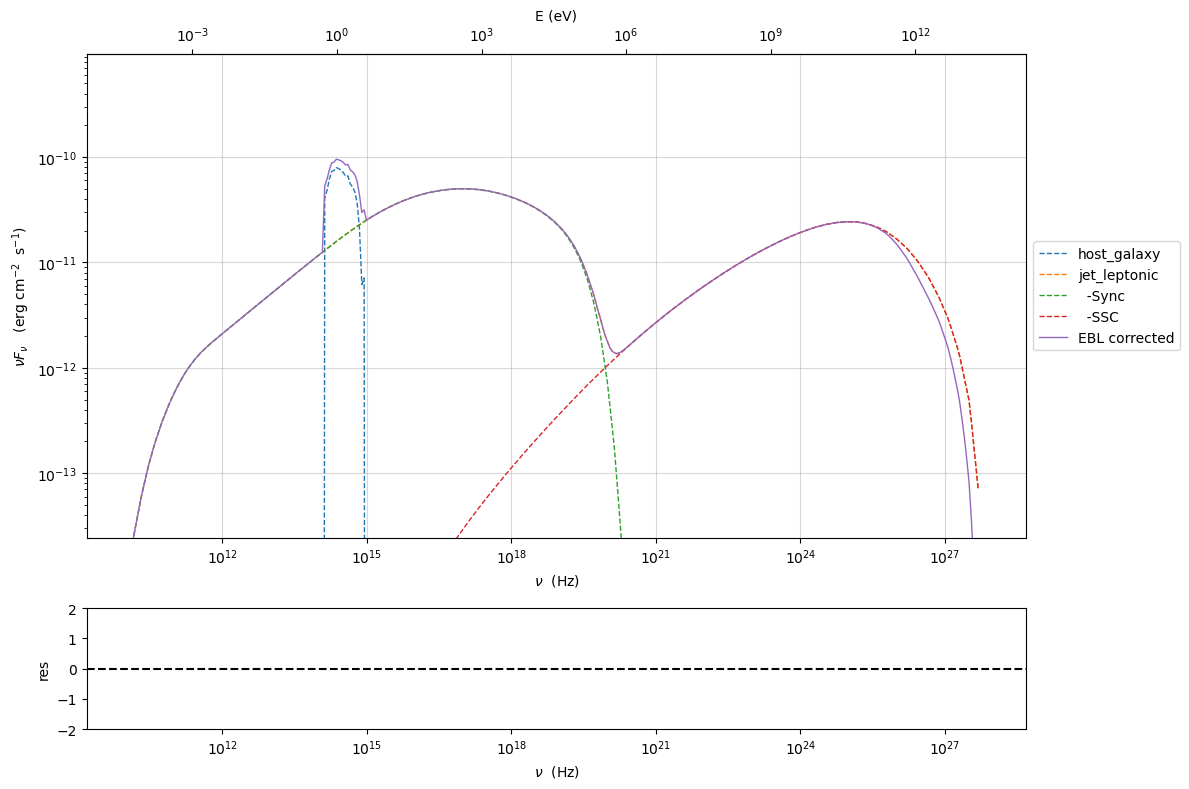

In [32]:
composite_model.eval()
composite_model.plot_model()

In [33]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet



composite_model.freeze(prefit_jet,'z_cosm')
composite_model.freeze(prefit_jet,'R_H')
composite_model.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
composite_model.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
composite_model.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
composite_model.jet_leptonic.parameters.z_cosm.val=0.03


composite_model.host_galaxy.parameters.nuFnu_p_host.frozen=False
composite_model.host_galaxy.parameters.nu_scale.frozen=True
composite_model.jet_leptonic.nu_size=200
composite_model.jet_leptonic.IC_nu_size=100
model_minimizer_lsb=ModelMinimizer('lsb')
best_fit=model_minimizer_lsb.fit(composite_model,sed_data,1E11,1E29,fitname='SSC-best-fit-lsb',repeat=3)

filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=1.05075e+01

fit run: 1
- old chisq=1.05075e+01


0it [00:00, ?it/s]

- best chisq=1.03861e+01

fit run: 2
- old chisq=1.03861e+01


0it [00:00, ?it/s]

- best chisq=1.03473e+01

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
host_galaxy,nuFnu_p_host,nuFnu-scale,erg / (s cm2),-1.008256e+01,-2.000000e+01,2.000000e+01,False,False
host_galaxy,nu_scale,nu-scale,Hz,1.934519e-02,-2.000000e+00,2.000000e+00,False,True
jet_leptonic,R,region_size,cm,1.126068e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.449834e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
jet_leptonic,beam_obj,beaming,,4.382890e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm(M),redshift,,3.000000e-02,0.000000e+00,--,False,True
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.304507e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.905419e+06,1.000000e+00,1.000000e+15,False,False



converged=True
calls=326
mesg=


'`ftol` termination condition is satisfied.'

dof=21
chisq=10.347315, chisq/red=0.492729 null hypothesis sig=0.974041

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
host_galaxy,nuFnu_p_host,-1.008256e+01,-1.008256e+01,1.788949e-02,--,-1.008538e+01,-1.222242e+01,-8.222416e+00,False
host_galaxy,nu_scale,1.934519e-02,--,--,--,1.934519e-02,-5.000000e-01,5.000000e-01,True
jet_leptonic,R,1.126068e+16,1.126068e+16,1.680987e+16,--,1.153993e+16,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.449834e-02,1.449834e-02,1.028970e-02,--,5.050000e-02,0.000000e+00,--,False
jet_leptonic,NH_cold_to_rel_e,1.000000e+00,--,--,--,1.000000e+00,0.000000e+00,--,True
jet_leptonic,beam_obj,4.382890e+01,4.382890e+01,1.999181e+01,--,2.500000e+01,5.000000e+00,5.000000e+01,False
jet_leptonic,z_cosm(M),3.000000e-02,--,--,--,3.000000e-02,0.000000e+00,--,True
jet_leptonic,gmin,1.304507e+02,1.304507e+02,1.659813e+02,--,1.487509e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,1.905419e+06,1.905419e+06,1.052149e+06,--,2.310708e+06,1.000000e+04,1.000000e+08,False


-------------------------------------------------------------------------




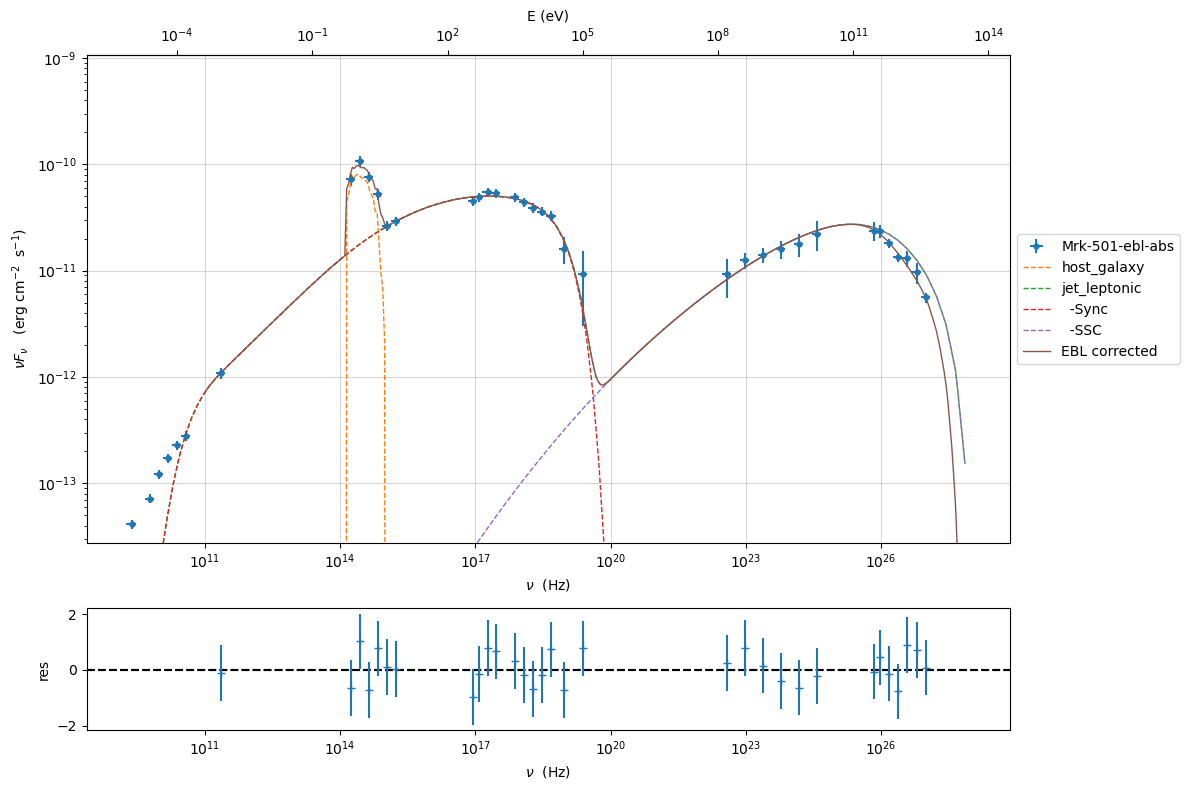

In [34]:
composite_model.nu_min=1E8
composite_model.jet_leptonic.nu_min=1E8
composite_model.eval()
p=composite_model.plot_model(sed_data=sed_data)